# Stabilize Learning with Data Scaling

Deep learning neural networks learn how to map inputs to outputs from examples in a training dataset. The model weights are initialized to small random values and updated via an optimization algorithm to estimate errors on the training dataset. Given the use of small weights in the model and the use of error between predictions and actual values, the scale of inputs and outputs used to train the model is important. Unscaled input variables can result in a slow or unstable learning process, whereas unscaled target variables on regression problems can result in exploding gradients, causing the learning process to fail. Data preparation involves using techniques such as normalization and standardization to rescale input and output variables before training a neural network model. This tutorial will explore how to improve neural network stability and modeling performance by scaling data. After completing this tutorial, you will know:

* Data scaling is a recommended pre-processing step when working with deep learning neural networks.
* Data scaling can be achieved by normalizing or standardizing real-valued input and output variables.
* How to apply standardization and normalization to improve the performance of a Multilayer Perceptron model on a regression predictive modeling problem.

## Data Scaling

In this section, you will discover the data scaling, its effect on the model during training, and tips on how to scale input and target variables when training your neural network models.

### The Scale of Your Data Matters

Deep learning neural network models learn a mapping from input variables to an output variable. As such, the scale and distribution of the data may be different for each variable. Input variables may have different units (e.g., feet, kilometers, and hours) that, in turn, may mean the variables have different scales. Differences in the scales across input variables may increase the difficulty of the problem being modeled. An example of this is that large input values (e.g., a spread of hundreds or thousands of units) can result in a model that learns large weight values. A model with large weight values is often unstable, meaning that it may suffer from poor performance during learning and sensitivity to input values resulting in higher generalization error.

A target variable with a large spread of values, in turn, may result in large error gradient values causing weight values to change dramatically, making the learning process unstable. Scaling input and output variables is a critical step in using neural network models.

### Scaling Input Variables

The input variables are those that the network takes on the input or visible layer to make a prediction. A good rule of thumb is that input variables should be small values, probably in the range of 0-1 or standardized with a zero mean and a standard deviation of one. Whether input variables require scaling depends on the specifics of your problem and of each variable. You may have a sequence of quantities as inputs, such as prices or temperatures.

If the distribution of the quantity is normal, then it should be standardized, otherwise, the data should be normalized. This applies if the range of quantity values is large (10s, 100s, etc.) or small (0.01, 0.0001). If the quantity values are small (near 0-1) and the distribution is limited (e.g., standard deviation near 1), you can perhaps get away with no scaling of the data. Problems can be complex, and it may not be clear how to best scale input data. If in doubt, normalize the input sequence. If you have the resources, explore modeling with the raw data, standardized data, and normalized data and see if there is a beneficial difference in the performance of the resulting model.

### Scaling Output Variables

The output variable is the variable predicted by the network. You must ensure that the scale of your output variable matches the scale of the activation function (transfer function) on the output layer of your network.

If your problem is a regression problem, then the output will be a real value. This is best modeled with a linear activation function. If the distribution of the value is normal, then you can standardize the output variable. Otherwise, the output variable can be normalized.

## Data Scaling Case Study

This section will demonstrate how to use data scaling to improve convergence with an MLP on a simple classification problem. This example provides a template for exploring data scaling with your neural network for classification and regression problems.

### Regression Predictive Modeling Problem

A regression predictive modeling problem involves predicting a real-valued quantity. We can use a standard regression problem generator provided by the scikit-learn library in the make_regression() function. This function will generate examples from a simple regression problem with a given number of input variables, statistical noise, and other properties. We will use this function to define a problem with 20 input features; 10 of the features will be meaningful, and ten will not be relevant. A total of 1,000 examples will be randomly generated. The pseudorandom number generator will be fixed to ensure that we get the same 1,000 examples each time the code is run.

In [24]:
from sklearn.datasets import make_regression

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

Each input variable has a Gaussian distribution, as does the target variable. We can demonstrate this by creating histograms of some of the input variables and the output variable.

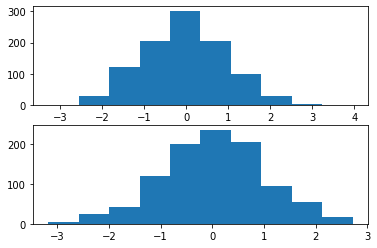

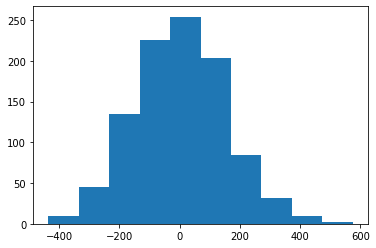

In [30]:
# regression predictive modeling problem
from matplotlib import pyplot

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# histograms of input variables
pyplot.subplot(211)
pyplot.hist(X[:, 0])
pyplot.subplot(212)
pyplot.hist(X[:, 1])
pyplot.show()

# histogram of target variable
pyplot.hist(y)
pyplot.show()

Running the example creates two figures. The first shows histograms of the first two of the twenty input variables, showing that each has a Gaussian data distribution.

The second figure shows a histogram of the target variable, showing a much larger range than the input variables and Gaussian data distribution.

Now that we have a regression problem that we can use as the basis for the investigation, we can develop a model to address it.

### Multilayer Perceptron With Unscaled Data

We can develop a Multilayer Perceptron (MLP) model for the regression problem. A model will be demonstrated on the raw data without scaling the input or output variables. We expect that model performance will be generally poor. The first step is to split the data into train and test sets to fit and evaluate a model. We will generate 1,000 examples from the domain and split the dataset in half, using 500 examples for the train and test datasets.

In [31]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

Next, we can define an MLP model. The model will expect 20 inputs in the 20 input variables in the problem. A single hidden layer will be used with 25 nodes and a rectified linear activation function. The output layer has one node for the single target variable and a linear activation function to predict real values directly.

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

The mean squared error loss function will be used to optimize the model, and the stochastic gradient descent optimization algorithm will be used with the sensible default configuration of a learning rate of 0.01 and a momentum of 0.9.

In [33]:
from tensorflow.keras.optimizers import SGD

# compile model
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.9))

The model will be fit for 100 training epochs, and the test set will be used as a validation set, evaluated at the end of each training epoch. The mean squared error is calculated on the train and test datasets at the end of training to get an idea of how well the model learned the problem.

In [34]:
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)

Finally, learning curves of the mean squared error on the train and test sets at the end of each training epoch are graphed using line plots, providing learning curves to get an idea of the dynamics of the model while learning the problem.

```
# plot loss during training
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
```

Tying these elements together, the complete example is listed below.

In [38]:
# mlp with unscaled data for the regression problem
from sklearn.datasets import make_regression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

# compile model
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.9))

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: nan, Test: nan


Running the example fits the model and calculates the mean squared error on the train and test sets. In this case, the model cannot learn the problem, resulting in predictions of NaN values. The model weights exploded during training given the very large errors and, in turn, error gradients calculated for weight updates.

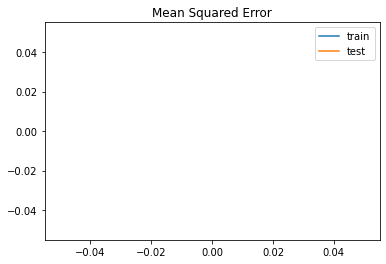

In [39]:
# plot loss during training
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

This demonstrates that, at the very least, some data scaling is required for the target variable. A plot of training history is created but does not show anything as the model almost immediately results in a NaN mean squared error.

### Multilayer Perceptron With Scaled Output Variables

The example can be updated to scale the target variable. Reducing the scale of the target variable will, in turn, reduce the size of the gradient used to update the weights and result in a more stable model and training process. Given the Gaussian distribution of the target variable, a natural method for rescaling the variable would be to standardize the variable. This requires estimating the mean and standard deviation of the variable and using these estimates to perform the rescaling. It is best practice is to estimate the mean and standard deviation of the training dataset and use these variables to scale the train and test dataset. This is to avoid any data leakage during the model evaluation process. The scikit-learn transformers expect input data to be matrices of rows and columns, therefore the 1D arrays for the target variable will have to be reshaped into 2D arrays before the transforms.

In [40]:
# reshape 1d arrays to 2d arrays
trainy = trainy.reshape(len(trainy), 1)
testy = testy.reshape(len(trainy), 1)

We can then create and apply the StandardScaler to rescale the target variable.

In [42]:
from sklearn.preprocessing import StandardScaler

# created scaler
scaler = StandardScaler()

# fit scaler on training dataset
scaler.fit(trainy)

# transform training dataset
trainy = scaler.transform(trainy)

# transform test dataset
testy = scaler.transform(testy)

Rescaling the target variable means estimating the model's performance and plotting the learning curves will calculate an MSE in the scaled variable's squared units rather than the original scale's. This can make interpreting the error within the context of the domain challenging. In practice, it may be helpful to estimate the model's performance by first inverting the transform on the test dataset target variable and on the model predictions and estimating model performance using the root mean squared error on the unscaled data. The complete example of standardizing the target variable for the MLP on the regression problem is listed below.

In [55]:
# mlp with scaled outputs on the regression problem
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from numpy import mean, std
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# reshape 1d arrays to 2d arrays
trainy = trainy.reshape(len(trainy), 1)
testy = testy.reshape(len(trainy), 1)

# created scaler
scaler = StandardScaler()

# fit scaler on training dataset
scaler.fit(trainy)

# transform training dataset
trainy = scaler.transform(trainy)

# transform test dataset
testy = scaler.transform(testy)

# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

# compile model
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.9))

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.002, Test: 0.004


Running the example fits the model and calculates the mean squared error on the train and test sets.

**Note**: Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

In this case, the model appears to learn the problem and achieves near-zero mean squared error, at least three decimal places.

A line plot of the mean squared error on the train (blue) and test (orange) dataset over each training epoch is created. In this case, we can see that the model rapidly learns to map inputs to outputs for the regression problem effectively and achieves good performance on both datasets throughout the run, neither overfitting nor underfitting the training dataset.

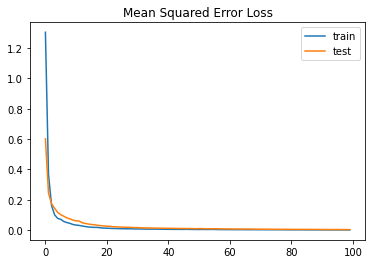

In [56]:
# plot loss during training
pyplot.title('Mean Squared Error Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

It may be interesting to repeat this experiment and normalize the target variable instead and compare results.

### Multilayer Perceptron With Scaled Input Variables

We have seen that data scaling can stabilize the training process when fitting a regression model with a widespread target variable. It is also possible to improve the stability and performance of the model by scaling the input variables. This section will design an experiment to compare the performance of different scaling methods for the input variables. The input variables also have a Gaussian data distribution, like the target variable, therefore we would expect that standardizing the data would be the best approach. This is just a heuristic, and it is always best to evaluate different scaling methods and discover what works best.

We can compare the performance of the unscaled input variables to models that fit with either standardized or normalized input variables. The first step is to define a function to create the same 1,000 data samples, split them into train and test sets, and apply the data scaling methods specified via input arguments. The `get_dataset()` function below implements this, requiring the scaler to be provided for the input and target variables and returns the train and test datasets split into input and output components ready to train and evaluate a model.

In [57]:
# prepare dataset with input and output scalers, can be none
def get_dataset(input_scaler, output_scaler):
    # generate dataset
    X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]

    # scale inputs
    if input_scaler is not None:
        # fit scaler
        input_scaler.fit(trainX)

        # transform training dataset
        trainX = input_scaler.transform(trainX)

        # transform test dataset
        testX = input_scaler.transform(testX)

    if output_scaler is not None:
        # reshape 1d arrays to 2d arrays
        trainy = trainy.reshape(len(trainy), 1)
        testy = testy.reshape(len(trainy), 1)

        # fit scaler on training dataset
        output_scaler.fit(trainy)

        # transform training dataset
        trainy = output_scaler.transform(trainy)
        
        # transform test dataset
        testy = output_scaler.transform(testy)
    
    return trainX, trainy, testX, testy

Next, we can define a function to fit an MLP model on a given dataset and return the mean squared error for the fit model on the test dataset. The evaluate model() function below implements this behavior.

In [58]:
# fit and evaluate mse of model on test set
def evaluate_model(trainX, trainy, testX, testy):
    # define model
    model = Sequential()
    model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='linear'))
    
    # compile model
    model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.9))

    # fit model
    model.fit(trainX, trainy, epochs=100, verbose=0)

    # evaluate the model
    test_mse = model.evaluate(testX, testy, verbose=0)

    return test_mse

Neural networks are trained using a stochastic learning algorithm. This means that the same model fit on the same data may result in a different performance. We can address this in our experiment by repeating the evaluation of each model configuration, in this case, a choice of data scaling multiple times and reporting performance as the mean of the error scores across all runs. We will repeat each run 30 times to ensure the mean is statistically robust. The repeated `evaluation()` function below implements this, taking the scaler for input and output variables as arguments, evaluating a model 30 times with those scalers, printing error scores along the way, and returning a list of the calculated error scores from each run.

In [59]:
# evaluate model multiple times with given input and output scalers
def repeated_evaluation(input_scaler, output_scaler, n_repeats=30):
    # get dataset
    trainX, trainy, testX, testy = get_dataset(input_scaler, output_scaler)

    # repeated evaluation of model
    results = list()
    for _ in range(n_repeats):
        test_mse = evaluate_model(trainX, trainy, testX, testy)
        print('>%.3f' % test_mse)
        results.append(test_mse)
    
    return results

Finally, we can run the experiment and evaluate the same model on the same dataset in three different ways:

* No scaling of inputs, standardized outputs.
* Normalized inputs, standardized outputs.
* Standardized inputs, standardized outputs.

The mean and standard deviation of the error for each configuration is reported, then box and whisker plots are created to summarize the error scores for each configuration.

In [60]:
# unscaled inputs
results_unscaled_inputs = repeated_evaluation(None, StandardScaler())

# normalized inputs
results_normalized_inputs = repeated_evaluation(MinMaxScaler(), StandardScaler())

# standardized inputs
results_standardized_inputs = repeated_evaluation(StandardScaler(), StandardScaler())

# summarize results
print('Unscaled: %.3f (%.3f)' % (mean(results_unscaled_inputs), std(results_unscaled_inputs)))
print('Normalized: %.3f (%.3f)' % (mean(results_normalized_inputs), std(results_normalized_inputs)))
print('Standardized: %.3f (%.3f)' % (mean(results_standardized_inputs), std(results_standardized_inputs)))

>0.009
>0.005
>0.000
>0.005
>0.008
>0.010
>0.005
>0.011
>0.007
>0.002
>0.009
>0.000
>0.004
>0.004
>0.009
>0.003
>0.007
>0.007
>0.009
>0.013
>0.002
>0.003
>0.009
>0.011
>0.004
>0.009
>0.006
>0.001
>0.008
>0.003
>0.000
>0.000
>0.001
>0.000
>0.001
>0.000
>0.000
>0.001
>0.000
>0.000
>0.000
>0.000
>0.001
>0.000
>0.000
>0.000
>0.000
>0.000
>0.006
>0.000
>0.000
>0.000
>0.000
>0.000
>0.000
>0.000
>0.000
>0.000
>0.000
>0.000
>0.005
>0.008
>0.003
>0.008
>0.010
>0.004
>0.004
>0.007
>0.011
>0.005
>0.004
>0.001
>0.014
>0.003
>0.006
>0.007
>0.005
>0.003
>0.002
>0.010
>0.007
>0.001
>0.011
>0.005
>0.005
>0.002
>0.005
>0.001
>0.000
>0.012
Unscaled: 0.006 (0.003)
Normalized: 0.001 (0.001)
Standardized: 0.006 (0.003)


Running the example prints the mean squared error for each model run along the way. After each of the three configurations has been evaluated 30 times each, the mean errors for each are reported.

**Note**: Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

In this case, we can see that, as we expected, scaling the input variables does result in a model with better performance. Unexpectedly, better performance is seen using normalized inputs instead of standardized inputs. This may be related to the choice of the rectified linear activation function in the first hidden layer.

A figure with three box and whisker plots is created summarizing the spread of error scores for each configuration. The plots show little difference between the distributions of error scores for the unscaled and standardized input variables. The normalized input variables result in better performance and a more stable or tighter distribution of error scores. These results highlight that it is important to experiment and confirm the results of data scaling methods rather than assuming that a given data preparation scheme will work best based on the observed distribution of the data.

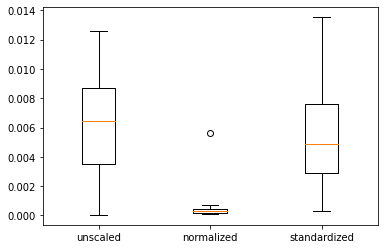

In [61]:
# plot results
results = [results_unscaled_inputs, results_normalized_inputs, results_standardized_inputs]
labels = ['unscaled', 'normalized', 'standardized']
pyplot.boxplot(results, labels=labels)
pyplot.show()

**Extensions**

This section lists some ideas for extending the tutorial that you may wish to explore.
* Normalize Target Variable. Update the example and normalize instead of standardizing the target variable and compare results.
* Compared Scaling for Target Variable. Update the example to compare standardizing and normalizing the target variable using repeated experiments and compare the results. 
* Other Scales. Update the example to evaluate other min/max scales when normalizing and compare performance, e.g. [-1, 1] and [0.0, 0.5].

**Summary** 

In this tutorial, you discovered how to improve neural network stability and modeling performance by scaling data. Specifically, you learned:
* Data scaling is a recommended pre-processing step when working with deep learning neural networks.
* Data scaling can be achieved by normalizing or standardizing real-valued input and output variables.
* How to apply standardization and normalization to improve the performance of a Multilayer Perceptron model on a regression predictive modeling problem.
